In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install python-pptx



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 55.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.8/152.8 KB 13.9 MB/s eta 0:00:00
  Created wheel for python-pptx: filename=python_pptx-0.6.21-py3-none-any.whl size=470950 sha256=6c3d2495bb42909ec13873ed07e727138777d48781e7a1b10308da588d00777d
  Stored in directory: /root/.cache/pip/wheels/0e/4a/ed/9653bc799915f52dce3f04d14946fbd85cce9c3cdedc9cfa71
Successfully built python-pptx


In [ ]:
from pptx import Presentation
from pptx.util import Inches
import pandas as pd
import numpy as np
import datetime as dt
import requests
import io

import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ColabNotebooks/EscuelaDeDataScienceEInteligenciaArtificial/Data e Inteligencia Artificial/Practicas/colegiosPrivadosColombia/COLEGIOS_PRIVADOS_Y_OFICIALES.csv')
df.head(10)

,año,secretaria,nombreestablecimiento,zona,direccion,telefono,nombre_Rector,tipo_Establecimiento,etnias,sector,...,numero_de_Sedes,estado,prestador_de_Servicio,propiedad_Planta_Fisica,resguardo,matricula_Contratada,calendario,internado,estrato_Socio_Economico,correo_Electronico
0,2016,BOGOTA,INST DE BTO TEC COMERCIAL PITAGORAS ...,URBANA,KR 5 11 67,5665677 / 3429092,YOLANDA ARIAS CRUZ,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,pitagoras@pitagoras.edu.co
1,2016,BOGOTA,GIMNASIO INFANTIL FEDERICO FROEBEL,URBANA,CL 32 SUR 52 A 54,7100349,SANDRA MILENA MENDEZ,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,gimfedebel@hotmail.com
2,2016,BOGOTA,GIMNASIO INFANTIL LOS NIÑOS DEL MAÑANA,URBANA,CL 134 D 47 27,6010350,CLAUDIA BOCACHICA SAENZ,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,claudialindenibocachica@hotmail.com
3,2016,BOGOTA,COLEGIO FRANCISCO PRIMERO S.S. (IED),URBANA,KR 28 63 64,2126019 -- 2481271,JOSE CUSTODIO GALARZA MORENO,INSTITUCION EDUCATIVA,NaN,NaN,...,4,NaN,OFICIAL,OFICIAL,NO APLICA,NO,A,NaN,NaN,cedalemania12@redp.edu.co
4,2016,BOGOTA,COL SAN JUAN VIANETH ...,URBANA,KR 2 C 3 18 SUR,2804738 -- 4714934,GLORIA ESPERANZA CHUQUIN LAISECA,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,colegiosanjuanviateh@hotmail.com -- colegiosan...
5,2016,BOGOTA,COL SAN PATRICIO ...,URBANA,KR 80 137 02,6838640 -- 6815357,PAULINA ENCINALES DE SANJINES,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,correo@colegiodesanpatricio.edu.co
6,2016,BOGOTA,COL CRISTIANO FUENTE DE VIDA ...,URBANA,CL 89 A BIS B 113 45,4316805,SANDRA PATRICIA ESPITIA,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,fuentedevida9@latinmail.com ...
7,2016,BOGOTA,LIC PARROQ SAN JOSE ...,URBANA,TV 13 H 45 F 33 SUR,7607585,ANDRES PEREZ LIZARAZO,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,lpsj2003@yahoo.com
8,2016,BOGOTA,LIC ESTRELLITA ESTUDIANTIL ...,URBANA,KR 64 64 64,2310592,PATRICIA CASTIBLANCO TORRES,CENTRO EDUCATIVO,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,lee5815@hotmail.com estrellitaestudiantil@ho...
9,2016,BOGOTA,COL LUIGI PIRANDELLO,URBANA,KR 113 74 B 06,4424545 -- 2286068,JORGE HERNAN NARANJO PUERTAS,INSTITUCION EDUCATIVA,NaN,NaN,...,1,NaN,PERSONA NATURAL,PERSONA NATURAL,NO APLICA,NO,A,NaN,NaN,clp2013academico@gmail.com -- clp.secretaria@g...


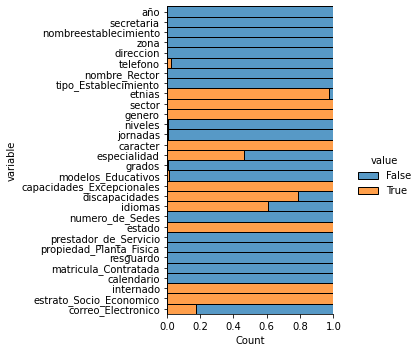

In [ ]:
bar_plot=(
    df
    .isnull()
    .melt()
    .pipe(
        lambda df:(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple='fill'
            )
        )
    )
)

bar_plot.savefig('room_types.png', bbox_inches='tight')

In [ ]:
#Create blank PowerPoint file
prs = Presentation()

In [ ]:



title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')


In [ ]:
from pptx import Presentation
from pptx.util import Inches

img_path = 'room_types.png'

prs = Presentation()
blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left = top = Inches(1)
pic = slide.shapes.add_picture(img_path, left, top)

left = Inches(5)
height = Inches(5.5)
pic = slide.shapes.add_picture(img_path, left, top, height=height)

prs.save('testImage.pptx')

In [ ]:

title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')